# NQ-6-HandsOnAnalysis_Method3Topk0sEvaluation

- NQ dev with FiD retrieved passages
    - Method3. '00011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (__0.57839__)     

- Both cases show that including consecutive 0s improved the overall output
- So Questions : How many consecutive 0s are needed?
    - Creating DATASET with Method3 with Top0s from 1 ~ 5
    
- __Evaluating DATASET from NQ-5-HandsOnAnalysisMethod3Topk0sDataset__
    - here sample_size = 20 or 100

In [1]:
from cycler import cycler
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pathlib
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import os
from rich.console import Console
from rich.table import Table
from util import utils
import re

In [2]:
def get_table(title, columns, rows):

    table = Table(title=title)
    
    table.add_column("", justify="center")
    for column in columns:
        table.add_column(column, justify="center")
    
    for row in rows:
        table.add_row(*row)
        

    console = Console(record=True)
    console.print(table, justify="center")
#     console.save_text(f"./images/{title}")

In [3]:
raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]


light_palette = np.array(raw_light_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255

Light mode palette


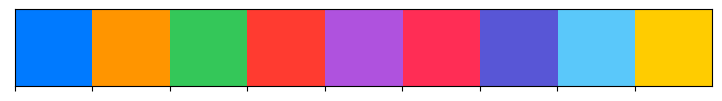

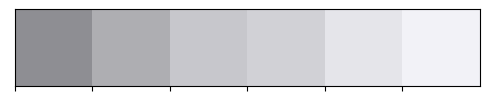

In [4]:
print('Light mode palette')
sns.palplot(light_palette)
sns.palplot(gray_light_palette)

In [5]:
# cmap 수정
mpl.rcParams['axes.prop_cycle'] = cycler('color',light_palette)
# 해상도 조정
mpl.rcParams['figure.dpi'] = 200
# ax의 우측과 상단 지우기
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

## KILT BM25 NQ negative (from DPR) depreciated

In [6]:
# option = 'bm25'
# path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ'
# # path = '/data/philhoon-relevance/FiD/results/KILT_DPR_NQ_depreciated'
# plot_path = './img/FiDResultOnBM25HardnegativeNQdevSubsets.png'
# title = 'FiD result on BM25 negative nq dev subsets'

## KILT Random Sampling NQ negative  depreciated

In [7]:
# option = 'random'
# path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/FiDResultOnRandomSamplingnegativeNQdevSubsets.png'
# title = 'FiD result on random sampling negative nq dev subsets'

## KILT BM25 NQ negative (from DPR)

In [8]:
# option = 'bm25'
# path = '/data/philhoon-relevance/FiD/results/KILT_BM25_NQ'

## KILT Random Sampling NQ negative 

In [9]:
# option = 'random'
# path = '/data/philhoon-relevance/FiD/results/KILT_RANDOM_NQ'
# plot_path = './img/New_FiDResultOnRandomSamplingnegativeNQdev2539.png'
# title = 'New FiD result on random sampling negative nq dev subsets'

In [10]:
# path = pathlib.Path(path)

In [11]:
# files = path.glob('**/*.txt')
# pprint(list(files))

In [12]:
# dict_eval = {
#     'pos' : [],
#     'ctx' : [],
#     'em' : []
# }

# sample_size = 5
# for pos in range(1, sample_size+1):
#     for ctx in range(pos, sample_size+1):
    
# #         # bm25 negative filenames
# #         file_name_ = f'kilt_dpr_nq_dev_pos{pos}_context{ctx}'

#         # random sampling negative filenames
#         if option == 'random':
#             file_name_ = f'kilt_rand_nq_dev_pos{pos}_context{ctx}'
#             file = list(path.glob(f'*{file_name_}*/*.txt'))
#             test = file[0] 
#         # DPR should be changed to bm25
#         if option == 'bm25':
#             file_name_ = f'kilt_bm25_nq_dev_pos{pos}_context{ctx}'
#             file = list(path.glob(f'*{file_name_}*/*.txt'))
#             test = file[0] 
        
#         print(test)
        
#         df = pd.read_csv(test, sep = '\t', header=None)
#         df.columns = ['id','inference','em']
#         print(len(df))
#         em = float(sum(df['em'])/len(df))
        
#         dict_eval['pos'].append(pos)
#         dict_eval['ctx'].append(ctx)
#         dict_eval['em'].append(em)
        
        

## KILT BM25 NQ incremetal result (from DPR)
    -  Get upperbound & lowerBound

In [13]:
# # '/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/incremental_result/pos1_ctx1.json'
# pos = 1
# sample_size = 5
# path2 = '/data/philhoon-relevance/FiD/results/KILT_BM25_NQ/incremental_result/'

In [14]:
# path2 = pathlib.Path(path2)
# files = path2.glob(f'pos{pos}*.txt')
# pprint(list(files))

## NQ DPR NQ incremetal result 
    - Realistic Scenario
    - Get upperbound & lowerBound
    - Unlike preivous one
    - Upperbound : Accumulated EM of FiD from from top_20
    - Lowerbound : EM of FiD from DPR retrived from top_20
    - Values : 16 Selection Strategies

### Lowerbound : EM of FiD from DPR retrived from top_{sample_size}
- sample_size = 20 or 100

In [15]:
sample_size = 100

In [16]:
path = '/data/philhoon-relevance/FiD/results/NQ_DPR/DEV'
title = 'FiD result by number of passage on DPR retrieved dataset'
path = pathlib.Path(path)

In [17]:
path = pathlib.Path(path)

In [18]:
# files = path.glob('**/final_output.txt')
# pprint(sorted(list(files)))

In [19]:
normal_eval = {
    'ctx' : [],
    'em' : []
}



for ctx in range(1, sample_size+1):
    file_name_ = f'NQ_dev_{ctx}_context'
    file_path = list(path.glob(f'**/{file_name_}*/*.txt'))
    
    test = file_path[0]
    print(file_name_)
    df = pd.read_csv(test, sep = '\t', header=None)
    df.columns = ['id','inference','em']
#     print(len(df))
    em = float(sum(df['em'])/len(df))
        
    normal_eval['ctx'].append(ctx)
    normal_eval['em'].append(em)
        
        

NQ_dev_1_context
NQ_dev_2_context
NQ_dev_3_context
NQ_dev_4_context
NQ_dev_5_context
NQ_dev_6_context
NQ_dev_7_context
NQ_dev_8_context
NQ_dev_9_context
NQ_dev_10_context
NQ_dev_11_context
NQ_dev_12_context
NQ_dev_13_context
NQ_dev_14_context
NQ_dev_15_context
NQ_dev_16_context
NQ_dev_17_context
NQ_dev_18_context
NQ_dev_19_context
NQ_dev_20_context
NQ_dev_21_context
NQ_dev_22_context
NQ_dev_23_context
NQ_dev_24_context
NQ_dev_25_context
NQ_dev_26_context
NQ_dev_27_context
NQ_dev_28_context
NQ_dev_29_context
NQ_dev_30_context
NQ_dev_31_context
NQ_dev_32_context
NQ_dev_33_context
NQ_dev_34_context
NQ_dev_35_context
NQ_dev_36_context
NQ_dev_37_context
NQ_dev_38_context
NQ_dev_39_context
NQ_dev_40_context
NQ_dev_41_context
NQ_dev_42_context
NQ_dev_43_context
NQ_dev_44_context
NQ_dev_45_context
NQ_dev_46_context
NQ_dev_47_context
NQ_dev_48_context
NQ_dev_49_context
NQ_dev_50_context
NQ_dev_51_context
NQ_dev_52_context
NQ_dev_53_context
NQ_dev_54_context
NQ_dev_55_context
NQ_dev_56_context
N

In [20]:
pprint(normal_eval)

{'ctx': [1,
         2,
         3,
         4,
         5,
         6,
         7,
         8,
         9,
         10,
         11,
         12,
         13,
         14,
         15,
         16,
         17,
         18,
         19,
         20,
         21,
         22,
         23,
         24,
         25,
         26,
         27,
         28,
         29,
         30,
         31,
         32,
         33,
         34,
         35,
         36,
         37,
         38,
         39,
         40,
         41,
         42,
         43,
         44,
         45,
         46,
         47,
         48,
         49,
         50,
         51,
         52,
         53,
         54,
         55,
         56,
         57,
         58,
         59,
         60,
         61,
         62,
         63,
         64,
         65,
         66,
         67,
         68,
         69,
         70,
         71,
         72,
         73,
         74,
         75,
         76,
         77,
        

In [21]:
def get_lowerbound(incre_em):
    index_min = np.argmin(incre_em['em'])
    return incre_em['ctx'][index_min], incre_em['em'][index_min]

In [22]:
def get_upperbound(incre_em):
    index_max = np.argmax(incre_em['em'])
    return incre_em['ctx'][index_max], incre_em['em'][index_max]

##### Maximum of EM of FiD from DPR retrived from top_20
    - Used as lower bound
    
##### Minimum of EM of FiD from DPR retrived from top_20
    - Won't be used

In [23]:
upper_ctx, upper_em = get_upperbound(normal_eval)
print(upper_ctx, upper_em)
flower_ctx, flower_em = upper_ctx, upper_em

96 0.5258650222679


In [24]:
lower_ctx, lower_em = get_lowerbound(normal_eval)
print(lower_ctx, lower_em)

1 0.34246888203722736


### Upperbound : Accumulated EM of FiD from DPR retrived from top_20

In [25]:
# sample_size = 100
input_file = f'/data/philhoon-relevance/FiD/results/NQ_DPR/DEV/incremental_result_{sample_size}/ctx{sample_size}.json'

In [26]:
final_output = utils.open_json(input_file)

In [27]:
def extract_em_pattern(final_output):
    em_pattern_lst = []
    for instance in final_output:
        em_pattern_lst.append(instance['em_pattern'])
    return em_pattern_lst

In [28]:
em_pattnern_lst = extract_em_pattern(final_output)

In [29]:
def get_accumulated_em(em_pattnern_lst, sample_size):
    incre_em = {
        'ctx' : [],
        'em' : [],   
    }
    for ctx in range(1, sample_size+1):
        incre_em['ctx'].append(ctx)
        cnt = 0
        for pattern in em_pattnern_lst:
            if '1' in pattern[:ctx]:
                cnt += 1
        incre_em['em'].append(cnt/len(em_pattnern_lst))
    return incre_em

In [30]:
incre_em = get_accumulated_em(em_pattnern_lst, sample_size)

In [31]:
# incre_em

In [32]:
upper_ctx, upper_em = get_upperbound(incre_em)
print(upper_ctx, upper_em)

100 0.6230444216055727


##### Maximum of Accumulated EM of FiD from DPR retrived from top_20
    - Used as upper bound
    
##### Minimum of Accumulated EM of FiD from DPR retrived from top_20
    - Won't be used

In [33]:
upper_ctx, upper_em = get_upperbound(incre_em)
print(upper_ctx, upper_em)
fupper_ctx, fupper_em = upper_ctx, upper_em

100 0.6230444216055727


In [34]:
lower_ctx, lower_em = get_lowerbound(incre_em)
print(lower_ctx, lower_em)

1 0.34246888203722736


## NQ DPR NQ selection strategy result

In [35]:
option_dict = {
    'op1' : 'remove_damage',
    'op2' : 'remove_damage_irrelevant',
    'op3' : 'remove_damage_relevant',
    'op4' : 'remove_damage_irrelevant_relevant',
}
# option = 'op4'

In [36]:
option_p_dict = {
    'strict' : 'strict_positive',
    'naive' : 'naive_positive',
}
# option_p = 'strict'

In [37]:
option_d_dict = {
    'strict' : 'strict_damaging',
    'naive' : 'naive_damaging',
}
# option_d = 'strict'

In [38]:
input_path = f'/data/philhoon-relevance/FiD/results/NQ_DPR_DEV_SELECTION/ctx_{sample_size}'

In [39]:
in_path = pathlib.Path(input_path)
files = in_path.glob(f'**/*.txt')
# # pprint(list(files))
# for i in files:
# #     print(len(i))
#     print(i)
#     print('----')

In [40]:
method_dict = {
    'op3_strict_strict' : 'method6',
    'op3_strict_naive' : 'method4',
    'op3_naive_strict' : 'method5',
    'op3_naive_naive' : 'method3',
    'op4_strict_naive' : 'method2',
    'op4_naive_naive' : 'method1',
}

- option1, option2 are not needed
- Method1 : option4_naive_naive
- Method2 : option4_strict_naive 
- Method3 : option3_naive_naive
- Method4 : option3_strict_naive
- Method5 : option3_naive_strict
- Method6 : option3_strict_strict

In [41]:
selection_eval = {
    'strategy' : [],
    'em' : []
}

for op in option_dict.keys():
    for op_p in option_p_dict.keys():
        for op_d in option_d_dict.keys():
            strategy_ = f'{option_p_dict[op_p]}_{option_d_dict[op_d]}_{option_dict[op]}'
            strategy_name = f'{op}_{op_p}_{op_d}'
            if op == 'op1' or op == 'op2':
                continue
            if op == 'op4':
                if op_p == 'strict' and op_d == 'strict':
                    continue
                if op_p == 'naive' and op_d == 'strict': 
                    continue
            print(strategy_name)
            strategy_path = pathlib.Path(input_path, strategy_)
            file = list(strategy_path.glob(f'*.txt'))
            if len(file) != 1:
                print('----')
                print(f'strategy_name : {strategy_name}')
                print('Errror - no file')
                print('There should be 1 file per each path')
                print(file)
                print('----')
            else:
                test = file[0] 
            
#             print(test)
            df = pd.read_csv(test, sep = '\t', header=None)
            df.columns = ['id','inference','em']
#             print(len(df))
            em = float(sum(df['em'])/len(df))
        
            selection_eval['strategy'].append(method_dict[strategy_name])
            selection_eval['em'].append(em)
            

op3_strict_strict
op3_strict_naive
op3_naive_strict
op3_naive_naive
op4_strict_naive
op4_naive_naive


In [42]:
selection_eval

{'strategy': ['method6',
  'method4',
  'method5',
  'method3',
  'method2',
  'method1'],
 'em': [0.5601233299075026,
  0.6174488980244376,
  0.552243919150394,
  0.6183624528948269,
  0.5636633550302615,
  0.5810208975676602]}

In [43]:
def merge_normal_incre(incre_em, normal_eval, dict_eval):
    column_names = []
    row_values = []
    upper_ctx, upper_em = get_upperbound(incre_em)
    lower_ctx, lower_em = get_upperbound(normal_eval)
    column_names.append('UpperBound-AccumulatedEm')
    column_names.append('LowerBound-PositiveOneEm')
    row_values.append(str(upper_em))
    row_values.append(str(lower_em))
    
    for strat_, em_ in zip(dict_eval['strategy'], dict_eval['em']):
        column_names.append(strat_)
        row_values.append(str(em_))
        
    return column_names, row_values
    

In [44]:
# incre_em

In [45]:
col_lst, value_lst = merge_normal_incre(incre_em, normal_eval, selection_eval)

In [46]:
print(col_lst)
print(value_lst)

['UpperBound-AccumulatedEm', 'LowerBound-PositiveOneEm', 'method6', 'method4', 'method5', 'method3', 'method2', 'method1']
['0.6230444216055727', '0.5258650222679', '0.5601233299075026', '0.6174488980244376', '0.552243919150394', '0.6183624528948269', '0.5636633550302615', '0.5810208975676602']


### get top_zeros_result

In [47]:
input_path = f'/data/philhoon-relevance/FiD/results/NQ_DPR_DEV_SELECTION_METHOD3/ctx_{sample_size}'

In [48]:
path = pathlib.Path(input_path)

In [49]:
# in_path = pathlib.Path(input_path)
# files = in_path.glob(f'**/*.txt')
# # pprint(list(files))
# for i in files:
# #     print(len(i))
#     print(i)
#     print('----')

In [50]:
top_zeros = 10

In [53]:
top_zero_eval = {
    'ctx' : [],
    'em' : []
}



for top_zero in range(1, top_zeros+1):
    file_name_ = f'method3_topzeros{top_zero}'
    file_path = list(path.glob(f'**/{file_name_}/*.txt'))
    test = file_path[0]
#     print(file_name_)
    df = pd.read_csv(test, sep = '\t', header=None)
    df.columns = ['id','inference','em']
#     print(len(df))
    em = float(sum(df['em'])/len(df))
        
    top_zero_eval['ctx'].append(file_name_)
    top_zero_eval['em'].append(em)
        
        

In [54]:
top_zero_eval

{'ctx': ['method3_topzeros1',
  'method3_topzeros2',
  'method3_topzeros3',
  'method3_topzeros4',
  'method3_topzeros5',
  'method3_topzeros6',
  'method3_topzeros7',
  'method3_topzeros8',
  'method3_topzeros9',
  'method3_topzeros10'],
 'em': [0.5862738380723992,
  0.5892428914011648,
  0.5938106657531118,
  0.596208747287884,
  0.5976932739522668,
  0.5987210231814548,
  0.600433938563435,
  0.6013474934338243,
  0.6023752426630125,
  0.6034029918922005]}

In [55]:
for ctx, em in zip(top_zero_eval['ctx'], top_zero_eval['em']):
    col_lst.append(ctx)
    value_lst.append(str(em))
# col_lst, value_lst = merge_normal_incre(incre_em, normal_eval, selection_eval)

In [56]:
print(col_lst)
print(value_lst)

['UpperBound-AccumulatedEm', 'LowerBound-PositiveOneEm', 'method6', 'method4', 'method5', 'method3', 'method2', 'method1', 'method3_topzeros1', 'method3_topzeros2', 'method3_topzeros3', 'method3_topzeros4', 'method3_topzeros5', 'method3_topzeros6', 'method3_topzeros7', 'method3_topzeros8', 'method3_topzeros9', 'method3_topzeros10']
['0.6230444216055727', '0.5258650222679', '0.5601233299075026', '0.6174488980244376', '0.552243919150394', '0.6183624528948269', '0.5636633550302615', '0.5810208975676602', '0.5862738380723992', '0.5892428914011648', '0.5938106657531118', '0.596208747287884', '0.5976932739522668', '0.5987210231814548', '0.600433938563435', '0.6013474934338243', '0.6023752426630125', '0.6034029918922005']


In [57]:
def get_table(title, columns, rows):

    table = Table(title=title)
    
    table.add_column("", justify="center")
    for column in columns:
        table.add_column(column, justify="center")
    
    if any(isinstance(i, list) for i in rows):
        for row in rows:
            table.add_row(*row)
    else:
#         print(rows)
        name = 'result'
        single_row = [name] + rows
        table.add_row(*single_row)
        

    console = Console(record=True)
    console.print(table, justify="center")
#     console.save_text(f"./images/{title}")

In [58]:
# option_dict = {
#     'op1' : 'remove_damage',
#     'op2' : 'remove_damage_irrelevant',
#     'op3' : 'remove_damage_relevant',
#     'op4' : 'remove_damage_irrelevant_relevant',
# }
# option_p_dict = {
#     'strict' : 'strict_positive', # - decreasing # of positive passages
#     'naive' : 'naive_positive', # - increasing # of positive passage
# }
# option_d_dict = {
#     'strict' : 'strict_damaging', # - decreasing # of damaging passages
#     'naive' : 'naive_damaging', # - increasing # of damaging passages
# }

In [59]:
unit = 2
s_ind = 0
e_ind = s_ind + unit
title = 'Strategy Selection Table'
get_table(title, col_lst[s_ind:e_ind], value_lst[s_ind:e_ind])

                    Strategy Selection Table                                              
                         ┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓                          
                         ┃        ┃ UpperBound-AccumulatedEm ┃ LowerBound-PositiveOneEm ┃                          
                         ┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩                          
                         │ result │    0.6230444216055727    │     0.5258650222679      │                          
                         └────────┴──────────────────────────┴──────────────────────────┘

In [60]:
unit = 6
title = 'Strategy Selection Table op1'
s_ind = e_ind
e_ind = s_ind + unit
get_table(title, col_lst[s_ind:e_ind], value_lst[s_ind:e_ind])

                                           Strategy Selection Table op1                                            
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃        ┃     method6     ┃    method4     ┃     method5     ┃    method3     ┃     method2     ┃    method1     ┃
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ result │ 0.560123329907… │ 0.61744889802… │ 0.552243919150… │ 0.61836245289… │ 0.563663355030… │ 0.58102089756… │
└────────┴─────────────────┴────────────────┴─────────────────┴────────────────┴─────────────────┴────────────────┘

In [61]:
unit = 5
title = 'Strategy Selection Table op1'
s_ind = e_ind
e_ind = s_ind + unit
get_table(title, col_lst[s_ind:e_ind], value_lst[s_ind:e_ind])

                                           Strategy Selection Table op1                                            
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓ 
┃        ┃ method3_topzeros1  ┃ method3_topzeros2  ┃ method3_topzeros3  ┃ method3_topzeros4 ┃ method3_topzeros5  ┃ 
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩ 
│ result │ 0.5862738380723992 │ 0.5892428914011648 │ 0.5938106657531118 │ 0.596208747287884 │ 0.5976932739522668 │ 
└────────┴────────────────────┴────────────────────┴────────────────────┴───────────────────┴────────────────────┘

In [62]:
unit = 5
title = 'Strategy Selection Table op1'
s_ind = e_ind
e_ind = s_ind + unit
get_table(title, col_lst[s_ind:e_ind], value_lst[s_ind:e_ind])

                                           Strategy Selection Table op1                                            
┏━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓ 
┃        ┃ method3_topzeros6  ┃ method3_topzeros7 ┃ method3_topzeros8  ┃ method3_topzeros9  ┃ method3_topzeros10 ┃ 
┡━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩ 
│ result │ 0.5987210231814548 │ 0.600433938563435 │ 0.6013474934338243 │ 0.6023752426630125 │ 0.6034029918922005 │ 
└────────┴────────────────────┴───────────────────┴────────────────────┴────────────────────┴────────────────────┘

## Result with top-20

- Upperbound 0.58113      
- Method3. '00011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (__0.57839__)     

- Method4. '00011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span>10<span style="color:red">1</span>1000 (_0.57690_) 

- Method3-top5zero. '00000011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span>0<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (0.56800) 

- Method3-top4zero. '00000011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span>00<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (0.56583) 

- Method3-top3zero. '00000011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span>000<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (0.56354) 

- Method3-top2zero. '00000011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span>0000<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (0.56046) 

- Method3-top1zero. '00000011011000'  -> 
<span style="color:blue">0</span>00000<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (0.55646) 


- Method1. '00011011000'  -> 000<span style="color:red">1</span><span style="color:red">1</span>0<span style="color:red">1</span><span style="color:red">1</span>000 (0.55144)    

- Method2. '00011011000'  -> 000<span style="color:red">1</span>10<span style="color:red">1</span>1000  (0.53796)        
- Method6. '00011011000'  -> <span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span>10<span style="color:red">1</span>10<span style="color:blue">0</span><span style="color:blue">0</span> (0.53796)    

- Method5. '00011011000'  -> <span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:blue">0</span><span style="color:blue">0</span>    (0.53659) 

- Lowerbound 0.50211   

## Result with top-100

- Upperbound 0.623044  
- Method3. '00011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (__0.6183624__)     

- Method4. '00011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span>10<span style="color:red">1</span>1000 (_0.61744_) 

- Method3-top5zero. '00000011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span>0<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (0.597693) 

- Method3-top4zero. '00000011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span>00<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (0.596208) 

- Method3-top3zero. '00000011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span>000<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (0.593810) 

- Method3-top2zero. '00000011011000'  -> 
<span style="color:blue">0</span><span style="color:blue">0</span>0000<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (0.589242) 

- Method3-top1zero. '00000011011000'  -> 
<span style="color:blue">0</span>00000<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>000  (0.5862738) 


- Method1. '00011011000'  -> 000<span style="color:red">1</span><span style="color:red">1</span>0<span style="color:red">1</span><span style="color:red">1</span>000 (0.581020)    

- Method2. '00011011000'  -> 000<span style="color:red">1</span>10<span style="color:red">1</span>1000  (0.563663)        
- Method6. '00011011000'  -> <span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span>10<span style="color:red">1</span>10<span style="color:blue">0</span><span style="color:blue">0</span> (0.560123)    

- Method5. '00011011000'  -> <span style="color:blue">0</span><span style="color:blue">0</span><span style="color:blue">0</span><span style="color:red">1</span><span style="color:red">1</span>0<span style="color:red">1</span></span><span style="color:red">1</span>0<span style="color:blue">0</span><span style="color:blue">0</span>    (0.552243) 

- Lowerbound 0.52586  